<a href="https://colab.research.google.com/github/utkarsh-a113/CORE/blob/main/regressionPCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression PCC

setups

In [3]:
!pip install keras~=3.13.0 matplotlib~=3.10.0 numpy~=2.0.0 pandas~=2.2.0   tensorflow

print('\n\nAll requirements successfully installed.')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.10.0
    Uninstalling keras-3.10.0:
      Successfully uninstalled keras-3.10.0




All requirements successfully installed.


load dependencies

In [1]:
import numpy as np
import pandas as pd
#ml based
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import plotly.express as px

loading data sets

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

reading the datasets

In [3]:
insurance_df=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
training_df=insurance_df.loc[:,("age","bmi","children","charges")]
print('reading completed sucessfully')
print('total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.head(200)

reading completed sucessfully
total number of rows: 1338




,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
195,19,30.590,0,1639.56310
196,39,32.800,0,5649.71500
197,45,28.600,2,8516.82900
198,51,18.050,0,9644.25250


In [4]:
from google.colab import sheets
sheet=sheets.InteractiveSheet(df=training_df)

https://docs.google.com/spreadsheets/d/1VdS4qiT9FoaSYYqnHaO1yqc8gJ_ciDGIm-OpEjsVSlU/edit#gid=0


In [5]:
#to view data sets
print('total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.describe(include='all')

total number of rows: 1338




,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Correlation Matrix

In [6]:
training_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


The feature with strongest correlation to charges is age

In [7]:
px.scatter_matrix(training_df, dimensions=["age","bmi","charges"])

training the model

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

def create_model(input_dim):
    model = keras.Sequential([
        layers.Dense(1, input_shape=(input_dim,))
    ])
    model.compile(optimizer='adam', loss='mse')
    return model


def train_model(
        experiment_name: str,
        model: keras.Model,
        dataset: pd.DataFrame,
        label_name: str,
):
    """we are training the data here"""

    features = dataset.drop(columns=[label_name]).values
    label = dataset[label_name].values

    history = model.fit(
        x=features,
        y=label,
        batch_size=32,
        epochs=50
    )

    return history


print("success: defining linear regression functions complete.")


success: defining linear regression functions complete.


expt 1 (imsurance charges)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:106: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 322011712.0000 - rmse: 17944.6855
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 321958272.0000 - rmse: 17943.1953
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 321904768.0000 - rmse: 17941.7051
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 321850816.0000 - rmse: 17940.2012
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 321797856.0000 - rmse: 17938.7246
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 321743584.0000 - rmse: 17937.2129 
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 321690592.0000 - rmse: 17935.7344 
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 321636320.0000 - rmse: 17934.2227
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 321582944.0000 - rmse: 17932.7344 
Epoch 10/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 321529376.0000 - rmse: 17931.2402
Epoch 11/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 321475712.0000 - rmse: 17929

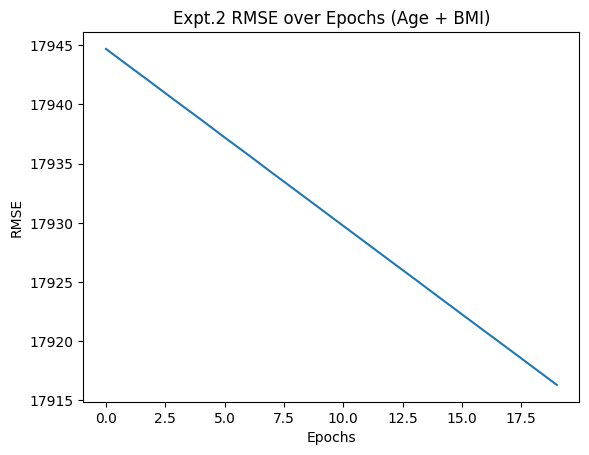

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


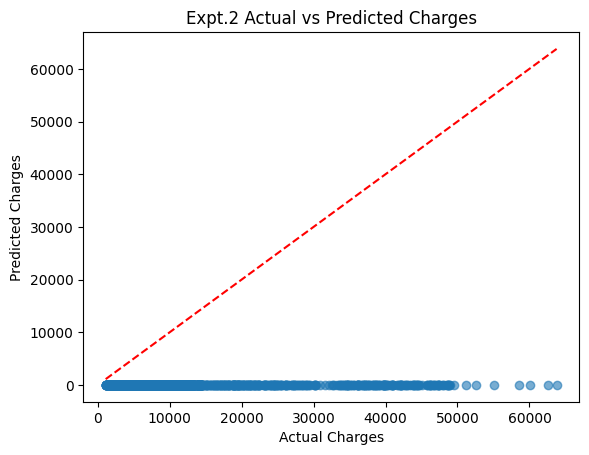

In [9]:
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

# -----------------------------------
# Hyperparameters
# -----------------------------------
learning_rate = 0.001
epochs = 20
batch_size = 50

input_features = ['age', 'bmi']
label_name = 'charges'

# -----------------------------------
# Prepare data
# -----------------------------------
X = training_df[input_features].values   # shape: (n_samples, 2)
y = training_df[label_name].values       # shape: (n_samples,)

# -----------------------------------
# Create model
# -----------------------------------
model_2 = create_model(input_dim=X.shape[1])

model_2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss='mse',
    metrics=[keras.metrics.RootMeanSquaredError(name='rmse')]
)

# -----------------------------------
# Train model
# -----------------------------------
history_2 = model_2.fit(
    x=X,
    y=y,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)

# -----------------------------------
# Plot RMSE vs Epochs
# -----------------------------------
plt.plot(history_2.history['rmse'])
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Expt.2 RMSE over Epochs (Age + BMI)')
plt.show()

# -----------------------------------
# Predictions
# -----------------------------------
predictions = model_2.predict(X).flatten()

# -----------------------------------
# Plot Actual vs Predicted (CORRECT way)
# -----------------------------------
plt.scatter(y, predictions, alpha=0.6)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Expt.2 Actual vs Predicted Charges')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.show()


:') bmi alone isnt a good choice


expt 2 fw hyperparameters

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:106: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 323087936.0000 - rmse: 17974.6465   
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323033792.0000 - rmse: 17973.1406 
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 322979264.0000 - rmse: 17971.6230 
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 322925792.0000 - rmse: 17970.1367 
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 322871584.0000 - rmse: 17968.6270 
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 322818304.0000 - rmse: 17967.1465
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 322763904.0000 - rmse: 17965.6309 
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 322710880.0000 - rmse: 17964.1562 
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 322656544.0000 - rmse: 17962.6426 
Epoch 10/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 322603104.0000 - rmse: 17961.1562 
Epoch 11/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 322549280.0000 - rms

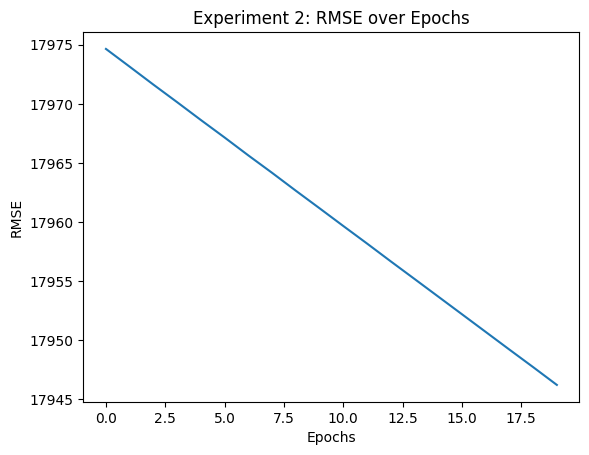

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


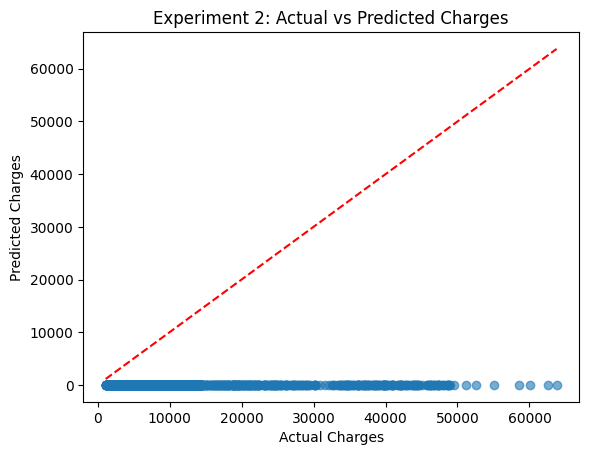

In [11]:
#@title Code - Experiment 2

import matplotlib.pyplot as plt
from tensorflow import keras

# -----------------------------------
# Hyperparameters (similar to ExperimentSettings)
# -----------------------------------
learning_rate = 0.001
epochs = 20
batch_size = 50

input_features = ['age', 'bmi']   # Experiment 2: more than one feature
label_name = 'charges'

# -----------------------------------
# Prepare data
# -----------------------------------
X = training_df[input_features].values
y = training_df[label_name].values

# -----------------------------------
# Create model
# -----------------------------------
model_2 = create_model(input_dim=len(input_features))

model_2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss='mse',
    metrics=[keras.metrics.RootMeanSquaredError(name='rmse')]
)

# -----------------------------------
# Train model
# -----------------------------------
history_2 = model_2.fit(
    x=X,
    y=y,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

# -----------------------------------
# Plot RMSE over epochs (ml_edu equivalent)
# -----------------------------------
plt.plot(history_2.history['rmse'])
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Experiment 2: RMSE over Epochs')
plt.show()

# -----------------------------------
# Plot predictions vs actual (ml_edu equivalent)
# -----------------------------------
predictions = model_2.predict(X).flatten()

plt.scatter(y, predictions, alpha=0.6)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Experiment 2: Actual vs Predicted Charges')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


expt 3 now with 3 features

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:106: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 322557088.0000 - rmse: 17959.8750   
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 322502496.0000 - rmse: 17958.3535 
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 322448288.0000 - rmse: 17956.8457 
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 322393344.0000 - rmse: 17955.3145 
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 322339392.0000 - rmse: 17953.8125 
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 322284448.0000 - rmse: 17952.2832 
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 322230016.0000 - rmse: 17950.7656 
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 322175584.0000 - rmse: 17949.2500 
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 322121056.0000 - rmse: 17947.7305 
Epoch 10/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 322066304.0000 - rmse: 17946.2051 
Epoch 11/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 322012128.0000 - rm

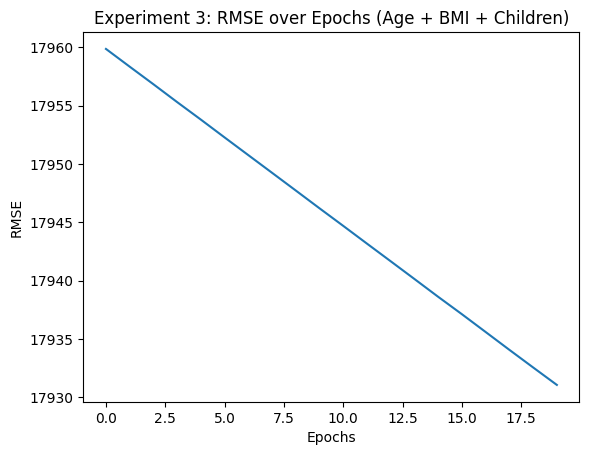

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


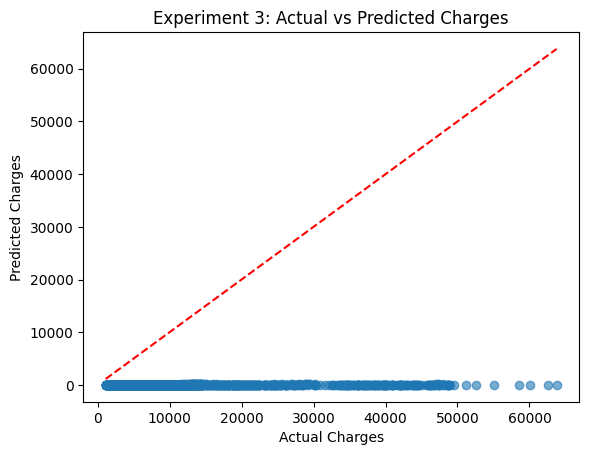

In [12]:
#@title Code - Experiment 3

import matplotlib.pyplot as plt
from tensorflow import keras

# -----------------------------------
# Hyperparameters (replacement for ExperimentSettings)
# -----------------------------------
learning_rate = 0.001
epochs = 20
batch_size = 50

# Experiment 3: three features
input_features = ['age', 'bmi', 'children']
label_name = 'charges'

# -----------------------------------
# Prepare data
# -----------------------------------
X = training_df[input_features].values
y = training_df[label_name].values

# -----------------------------------
# Create model
# -----------------------------------
model_3 = create_model(input_dim=len(input_features))

model_3.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss='mse',
    metrics=[keras.metrics.RootMeanSquaredError(name='rmse')]
)

# -----------------------------------
# Train model
# -----------------------------------
history_3 = model_3.fit(
    x=X,
    y=y,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

# -----------------------------------
# Plot RMSE over epochs (ml_edu equivalent)
# -----------------------------------
plt.plot(history_3.history['rmse'])
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Experiment 3: RMSE over Epochs (Age + BMI + Children)')
plt.show()

# -----------------------------------
# Plot predictions vs actual (ml_edu equivalent)
# -----------------------------------
predictions = model_3.predict(X).flatten()

plt.scatter(y, predictions, alpha=0.6)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Experiment 3: Actual vs Predicted Charges')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()
